In [1]:
import pandas as pd

# TSV-Datei einlesen
ab_ag_MMseqs2 = pd.read_csv('data/ab_ag_annotated.tsv', sep='\t')

# Liste der CDR-Spalten
cdr_columns = ['CDR_H1', 'CDR_H2', 'CDR_L1', 'CDR_L2', 'CDR_L3']

for cdr in cdr_columns:
    with open(f"{cdr}_seqs.fasta", "w") as f:
        for i, seq in enumerate(ab_ag_MMseqs2[cdr]):
            f.write(f">seq{i}\n{seq}\n")


In [10]:
#code im Terminal schreiben und die Bezüge, den Code dazu in hier eintragen, damit man weiß, was man macht
#die datei dann speichern und dann ist es auch okay
#COde nachdem Fasta datei erstellt wurde



#Erstellt eine interne MMseqs2-Datenbank mit Namen cdr_h1_db aus der FASTA-Datei CDR_H1_seqs.fasta.
mmseqs createdb CDR_H1_seqs.fasta cdr_h1_db


#Clustern
mmseqs cluster cdr_h1_db cdr_h1_clu tmp --min-seq-id 0.9 -c 0.8 --spaced-kmer-mode 0

#cdr_1_db: Name der Eingabe-Sequenzdatenbank
#clu Name der Ausgabedatei
#tmp: temporärer Arbeitsornder
# --minseq-id 0.9: Mindestens 90% sequenz identität
# -c 0.8: Coverage: 80% der kürzeren Sequenz vom alignment müssen abgedeckt sein
#--spaced-kmer-mode 0: Bestimmt den k-mer-Modus zur Vorfilterung, 0 bedeutet standardmäßige lückenlose k-mers




#TSV exportieren
mmseqs createtsv cdr_h1_db cdr_h1_db cdr_h1_clu "Test ordner/cdr_h1_clusters.tsv"


SyntaxError: invalid syntax (3456724142.py, line 8)

In [11]:
!pip install scikit-learn



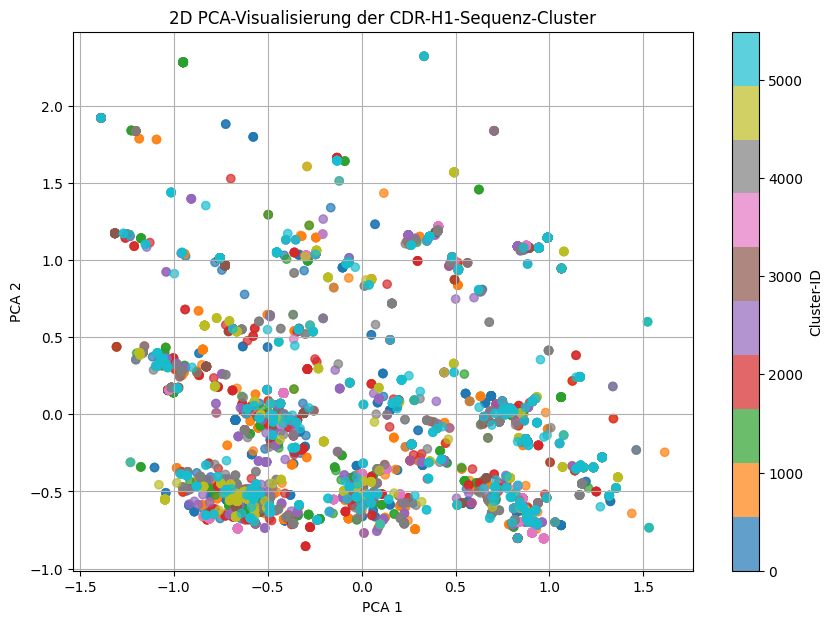

In [ ]:
# 📦 Notwendige Bibliotheken
import pandas as pd
from Bio import SeqIO
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Pfade definieren
fasta_file = "CDR_H1_seqs.fasta"
tsv_file = "Test ordner/cdr_h1_clusters.tsv"

# FASTA einlesen → DataFrame mit ID + Sequenz
seq_records = list(SeqIO.parse(fasta_file, "fasta"))
fasta_df = pd.DataFrame({
    "seq_id": [rec.id for rec in seq_records],
    "sequence": [str(rec.seq) for rec in seq_records]
})

#TSV-Cluster-Datei laden
cluster = pd.read_csv(tsv_file, sep="\t", header=None, names=["seq_id", "cluster_rep"])

#Sequenzen mit Clusterzuordnung verbinden
merged = pd.merge(cluster, fasta_df, on="seq_id")

#Sequenzen in k-mer-Vektoren umwandeln (k=2)
vectorizer = CountVectorizer(analyzer="char", ngram_range=(2, 2))
X = vectorizer.fit_transform(merged["sequence"])

#PCA auf 2 Dimensionen reduzieren
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

#2D-Plot nach Cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=pd.factorize(merged["cluster_rep"])[0],
                      cmap='tab10', alpha=0.7)
plt.title("2D PCA-Visualisierung der CDR-H1-Sequenz-Cluster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster-ID")
plt.grid(True)
plt.show()


In [ ]:
#Problem noch unbekannt kein Bezug zu Sequens und antigen
#welches clustering bei mmseqs2 und iwe werden DIstanzen berechnet